## <span style="color:#8B008B; font-weight:bold;">Analyzing Heart Disease Dataset</span>

### [**Dataset Link**](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

In [1]:
#importer les packages 
import numpy as np
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

In [2]:
#Read the excel file 
sheet=pd.read_csv('./Data/2022/heart_2022_with_nans.csv')

In [3]:
#Conversion to DataFrame
df=pd.DataFrame(sheet)

In [4]:
#Print the data set
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


# Data Exploration

In [5]:
df.shape

(445132, 40)

*`=> In our data set, we have 445132 rows and 40 columns .`*

In [6]:
# Verify if there are duplicate data.
df.duplicated().sum()

157

*`=> We have 157 duplicated rows .`*

In [7]:
# Remove duplicate rows
df=df.drop_duplicates()
# Print the new shape of the DataFrame 
print(df.shape)

(444975, 40)


*`=> After removing the duplicate rows, we found as a result 444975 rows and 40 columns .`*

In [8]:
# Display the informations of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

*`=> We have 444975 rows, and the index of these rows ranges from 0 to 444974. The reason for this is that I have removed the duplicate rows`*

In [9]:
#Reset index to avoid saving the old index 
df= df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444975 entries, 0 to 444974
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              44

*`=> We have many missing values in the majority of the columns of the data set`*

In [10]:
#Display descriptive statistics for categorical data before making changes
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434053.000000,435913.000000,439527.000000,416470.000000,403044.000000,396316.000000
mean,4.349372,4.384164,7.022909,1.702690,83.074632,28.529907
std,8.689968,8.388541,1.502618,0.107178,21.448241,6.554917
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [11]:
#Display descriptive statistics for categorical data before making any changes
df.describe(include='object')

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,444975,444975,443782,436674,443887,433620,441915,440575,443423,443207,...,389075,430927,435906,398547,378994,398000,368081,362605,394498,394357
unique,54,2,5,4,2,4,2,2,2,2,...,2,5,13,2,2,2,2,4,2,3
top,Washington,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,...,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,26142,235823,148372,350799,337411,233323,416807,414024,424185,376516,...,223215,320294,47084,210881,249911,209246,215600,121489,377313,270045


In [12]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['PhysicalActivities'].value_counts(dropna=False)

PhysicalActivities
Yes    337411
No     106476
NaN      1088
Name: count, dtype: int64

*`=> The column PhysicalActivities have 1088 missing values. The most Frequent value is Yes `*

In [13]:
# Replace the missing values in PhysicalActivities with mode
df['PhysicalActivities'] = df['PhysicalActivities'].fillna(df['PhysicalActivities'].mode()[0])

In [14]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['GeneralHealth'].value_counts(dropna=False)

GeneralHealth
Very good    148372
Good         143576
Excellent     71821
Fair          60272
Poor          19741
NaN            1193
Name: count, dtype: int64

*`=> The column GeneralHealth have 1193 missing values. `*

In [15]:
#Replace the missing values with the mode of the column GeneralHealth
df['GeneralHealth'].fillna(df['GeneralHealth'].mode()[0],inplace=True)

df['GeneralHealth'].value_counts(dropna=False)

C:\Users\Kahla\AppData\Local\Temp\ipykernel_20352\3616545553.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GeneralHealth'].fillna(df['GeneralHealth'].mode()[0],inplace=True)


GeneralHealth
Very good    149565
Good         143576
Excellent     71821
Fair          60272
Poor          19741
Name: count, dtype: int64

*`=> We replace the missing values with the most frequent value in the column is Good using mode(). `*

In [16]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['LastCheckupTime'].value_counts(dropna=False)

LastCheckupTime
Within past year (anytime less than 12 months ago)         350799
Within past 2 years (1 year but less than 2 years ago)      41917
Within past 5 years (2 years but less than 5 years ago)     24881
5 or more years ago                                         19077
NaN                                                          8301
Name: count, dtype: int64

*`=> The column LastCheckupTime have 8301 missing values. And the most Frequent value is "Within past year (anytime less than 12 months ago)" `*

In [17]:
#Replace the missing values with the mode of the column LastCheckupTime
df['LastCheckupTime'].fillna(df['LastCheckupTime'].mode()[0],inplace=True)

df['LastCheckupTime'].value_counts(dropna=False)

C:\Users\Kahla\AppData\Local\Temp\ipykernel_20352\200456260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LastCheckupTime'].fillna(df['LastCheckupTime'].mode()[0],inplace=True)


LastCheckupTime
Within past year (anytime less than 12 months ago)         359100
Within past 2 years (1 year but less than 2 years ago)      41917
Within past 5 years (2 years but less than 5 years ago)     24881
5 or more years ago                                         19077
Name: count, dtype: int64

In [18]:
# Replace the Last Checkup Time to a numerical value
Checkup_Time = {'Within past year (anytime less than 12 months ago)': 1, 'Within past 2 years (1 year but less than 2 years ago)':2, 'Within past 5 years (2 years but less than 5 years ago)':3, '5 or more years ago':4}
df['LastCheckupTime'] = df['LastCheckupTime'].map(Checkup_Time)
df['LastCheckupTime'] = df['LastCheckupTime'].astype('int64')

df['LastCheckupTime'].value_counts(dropna=False)

LastCheckupTime
1    359100
2     41917
3     24881
4     19077
Name: count, dtype: int64

*`=> We replace the missing values with the most frequent value in the column is "Within past year (anytime less than 12 months ago)" using mode(). `*

*`=> We replace the name of the values with numerical values in the column LastCheckupTime`*

In [19]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['PhysicalHealthDays'].value_counts(dropna=False)

PhysicalHealthDays
0.0     267668
30.0     33081
2.0      25256
1.0      17250
3.0      15948
5.0      15315
NaN      10922
10.0     10589
7.0       9348
15.0      8787
4.0       8462
20.0      5421
14.0      5029
6.0       2538
25.0      2181
8.0       1761
12.0      1111
21.0      1038
28.0       751
9.0        411
29.0       365
18.0       271
16.0       255
27.0       188
17.0       185
13.0       162
11.0       161
22.0       140
24.0       125
26.0       109
23.0        99
19.0        48
Name: count, dtype: int64

*`=> The column PhysicalHealthDays have 10922 missing values And the most Frequent value is 0.0 
and We notice that the values have type float, so we replace the type of the values with int`*

In [20]:
#Replace the missing values with the mode of the column PhysicalHealthDays
df['PhysicalHealthDays'].fillna(df['PhysicalHealthDays'].mode()[0],inplace=True)
#Change the data type of the column PhysicalHealthDays to int64
df['PhysicalHealthDays'] = df['PhysicalHealthDays'].astype('int64')


C:\Users\Kahla\AppData\Local\Temp\ipykernel_20352\2914332414.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PhysicalHealthDays'].fillna(df['PhysicalHealthDays'].mode()[0],inplace=True)


In [21]:
df['MentalHealthDays'].value_counts(dropna=False)

MentalHealthDays
0.0     265079
30.0     26990
2.0      23785
5.0      19950
10.0     15414
3.0      15345
15.0     14519
1.0      14408
20.0      9150
NaN       9062
4.0       7943
7.0       7844
25.0      3078
14.0      2871
6.0       2305
8.0       1749
12.0      1259
28.0       910
21.0       549
29.0       502
9.0        322
18.0       319
16.0       280
17.0       244
27.0       241
22.0       193
13.0       169
24.0       124
11.0       121
26.0       106
23.0        97
19.0        47
Name: count, dtype: int64

*`=> The column MentalHealthDays have 9062 missing values. And the most Frequent value is 0.0 
and We notice that the values have type float, so we replace the type of the values with int`*

In [22]:
# Replace the lines with missing MentalHealthDays with mode
df['MentalHealthDays'] = df['MentalHealthDays'].fillna(df['MentalHealthDays'].mode()[0])
# Change the Mental Health Days to a numerical value
df['MentalHealthDays'] = df['MentalHealthDays'].astype('int64')

In [23]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['SleepHours'].value_counts(dropna=False)

SleepHours
7.0     132848
8.0     125387
6.0      95866
5.0      30120
9.0      21209
4.0      12432
10.0     10459
NaN       5448
3.0       3260
12.0      3004
2.0       1549
1.0       1154
11.0       686
16.0       329
15.0       317
14.0       295
18.0       168
13.0       165
20.0       143
24.0        52
17.0        27
22.0        19
23.0        18
19.0        16
21.0         4
Name: count, dtype: int64

*`=> The column MentalHealthDays have 5448 missing values. And the most Frequent value is 7.0 
and We notice that the values have type float, so we replace the type of the values with int`*

In [24]:
# Replace the missing values in SleepHours with mode
df['SleepHours'] = df['SleepHours'].fillna(df['SleepHours'].mode()[0])
df['SleepHours'] = df['SleepHours'].astype('int64')

In [25]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['RemovedTeeth'].value_counts(dropna=False)

RemovedTeeth
None of them              233323
1 to 5                    129275
6 or more, but not all     45569
All                        25453
NaN                        11355
Name: count, dtype: int64

*`=> The column RemovedTeeth have 11355 missing values. And the most Frequent value is "None of them"`*

*`We replace the missing values with the most frequent value in the column is "None of them" using mode() and replace the values to a numerical values `*

In [26]:
# Replace the missing values in RemovedTeeth with (None of them)
df['RemovedTeeth'] = df['RemovedTeeth'].fillna('None of them')
# Replace the Removed Teeth to a numerical value
Removed_Teeth = {'None of them': 0, '1 to 5':1, '6 or more, but not all':2, 'All':3}
df['RemovedTeeth'] = df['RemovedTeeth'].map(Removed_Teeth)
df['RemovedTeeth'] = df['RemovedTeeth'].astype('int64')

In [27]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HadHeartAttack'].value_counts(dropna=False)

HadHeartAttack
No     416807
Yes     25108
NaN      3060
Name: count, dtype: int64

*`=> The column HadHeartAttack has a missing 3060 value. We will replace it with the mode of the column.`*

In [28]:
df['HadHeartAttack'] = df['HadHeartAttack'].fillna(df['HadHeartAttack'].mode()[0])

In [29]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HadAngina'].value_counts(dropna=False)

HadAngina
No     414024
Yes     26551
NaN      4400
Name: count, dtype: int64

*`=> The column HadAngina has a missing 4400 values. We will replace it with the mode of the column.`*

In [30]:
# Replace the missing values in HadAngina with mode
df['HadAngina'] = df['HadAngina'].fillna(df['HadAngina'].mode()[0])

In [31]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HadStroke'].value_counts(dropna=False)

HadStroke
No     424185
Yes     19238
NaN      1552
Name: count, dtype: int64

*`=> The column HadStroke has a missing 1552 values. We will replace it with the mode of the column.`*

In [32]:
# Replace the missing values in HadStroke with mode
df['HadStroke'] = df['HadStroke'].fillna(df['HadStroke'].mode()[0])

In [33]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HadAsthma'].value_counts(dropna=False)

HadAsthma
No     376516
Yes     66691
NaN      1768
Name: count, dtype: int64

*`=> The column HadAsthma has a missing 1768 values. We will replace it with the mode of the column.`*

In [34]:
# Replace the missing values in HadAsthma with mode
df['HadAsthma'] = df['HadAsthma'].fillna(df['HadAsthma'].mode()[0])

In [35]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HadSkinCancer'].value_counts(dropna=False)

HadSkinCancer
No     406358
Yes     35479
NaN      3138
Name: count, dtype: int64

*`=> The column HadSkinCancer has a missing 3138 values. We will replace it with the mode of the column.`*

In [36]:
# Replace the missing values in HadSkinCancer with mode
df['HadSkinCancer'] = df['HadSkinCancer'].fillna(df['HadSkinCancer'].mode()[0])

In [37]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HadCOPD'].value_counts(dropna=False)

HadCOPD
No     407105
Yes     35656
NaN      2214
Name: count, dtype: int64

*`=> The column HadCOPD has a missing 2214 values. We will replace it with the mode of the column.`*

In [38]:
# Replace the missing values in HadCOPD with mode
df['HadCOPD'] = df['HadCOPD'].fillna(df['HadCOPD'].mode()[0])

In [39]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HadDepressiveDisorder'].value_counts(dropna=False)

HadDepressiveDisorder
No     350758
Yes     91410
NaN      2807
Name: count, dtype: int64

*`=> The column HadDepressiveDisorder has a missing 2807 values. We will replace it with the mode of the column.`*

In [40]:
# Replace the missing values in HadDepressiveDisorder with mode
df['HadDepressiveDisorder'] = df['HadDepressiveDisorder'].fillna(df['HadDepressiveDisorder'].mode()[0])

In [41]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HadKidneyDisease'].value_counts(dropna=False)

HadKidneyDisease
No     422739
Yes     20315
NaN      1921
Name: count, dtype: int64

*`=> The column HadKidneyDisease has a missing 1921 values. We will replace it with the mode of the column.`*

In [42]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HadArthritis'].value_counts(dropna=False)

HadArthritis
No     291211
Yes    151136
NaN      2628
Name: count, dtype: int64

*`=> The column HadArthritis has a missing 2628 values. We will replace it with the mode of the column.`*

In [43]:
#Replace the missing values in HadArthritis with mode
df['HadArthritis'] = df['HadArthritis'].fillna(df['HadArthritis'].mode()[0])

In [44]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HadDiabetes'].value_counts(dropna=False)

HadDiabetes
No                                         368573
Yes                                         61155
No, pre-diabetes or borderline diabetes     10329
Yes, but only during pregnancy (female)      3836
NaN                                          1082
Name: count, dtype: int64

*`=> The column HadDiabetes has a missing 1082 values. We will replace it with the mode of the column.`*

In [45]:
# Replace the missing values in HadDiabetes with mode
df['HadDiabetes'] = df['HadDiabetes'].fillna(df['HadDiabetes'].mode()[0])
df['HadDiabetes'].value_counts()
# Replace the Had Diabetes to a numerical value
Diabetes = {'No': 0, 'Yes':1, 'No, pre-diabetes or borderline diabetes':2, 'Yes, but only during pregnancy (female)':3}
df['HadDiabetes'] = df['HadDiabetes'].map(Diabetes)
df['HadDiabetes'] = df['HadDiabetes'].astype('int64')

In [46]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['DeafOrHardOfHearing'].value_counts(dropna=False)

DeafOrHardOfHearing
No     385528
Yes     38945
NaN     20502
Name: count, dtype: int64

*`=> The column DeafOrHardOfHearing has a missing 20502 values. We will replace it with the mode of the column.`*

In [47]:
# Replace the missing values in DeafOrHardOfHearing with mode
df['DeafOrHardOfHearing'] = df['DeafOrHardOfHearing'].fillna(df['DeafOrHardOfHearing'].mode()[0])

In [48]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['BlindOrVisionDifficulty'].value_counts(dropna=False)

BlindOrVisionDifficulty
No     399898
Yes     23658
NaN     21419
Name: count, dtype: int64

*`=> The column BlindOrVisionDifficulty has a missing 21419 values. We will replace it with the mode of the column.`*

In [49]:
# Replace the missing values in BlindOrVisionDifficulty with mode
df['BlindOrVisionDifficulty'] = df['BlindOrVisionDifficulty'].fillna(df['BlindOrVisionDifficulty'].mode()[0])

In [50]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['DifficultyConcentrating'].value_counts(dropna=False)

DifficultyConcentrating
No     370780
Yes     50100
NaN     24095
Name: count, dtype: int64

*`=> The column DifficultyConcentrating has a missing 24095 values. We will replace it with the mode of the column.`*

In [51]:
# Replace the missing values in DifficultyConcentrating with mode
df['DifficultyConcentrating'] = df['DifficultyConcentrating'].fillna(df['DifficultyConcentrating'].mode()[0])

In [52]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['DifficultyWalking'].value_counts(dropna=False)

DifficultyWalking
No     353029
Yes     68079
NaN     23867
Name: count, dtype: int64

*`=> The column DifficultyWalking has a missing 23867 values. We will replace it with the mode of the column.`*

In [53]:
# Replace the missing values in DifficultyWalking with mode
df['DifficultyWalking'] = df['DifficultyWalking'].fillna(df['DifficultyWalking'].mode()[0])

In [54]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['DifficultyDressingBathing'].value_counts(dropna=False)

DifficultyDressingBathing
No     404392
NaN     23770
Yes     16813
Name: count, dtype: int64

*`=> The column DifficultyDressingBathing has a missing 23770 values. We will replace it with the mode of the column.`*

In [55]:
# Replace the missing values in DifficultyDressingBathing with mode
df['DifficultyDressingBathing'] = df['DifficultyDressingBathing'].fillna(df['DifficultyDressingBathing'].mode()[0])

In [56]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['DifficultyErrands'].value_counts(dropna=False)

DifficultyErrands
No     387017
Yes     32447
NaN     25511
Name: count, dtype: int64

*`=> The column DifficultyErrands has a missing 25511 values. We will replace it with the mode of the column.`*

In [57]:
# Replace the missing values in DifficultyErrands with mode
df['DifficultyErrands'] = df['DifficultyErrands'].fillna(df['DifficultyErrands'].mode()[0])

In [58]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['SmokerStatus'].value_counts(dropna=False)

SmokerStatus
Never smoked                             245949
Former smoker                            113769
Current smoker - now smokes every day     36003
NaN                                       35316
Current smoker - now smokes some days     13938
Name: count, dtype: int64

*`=> The column SmokerStatus has a missing 35316 values. We will replace it with the mode of the column.`*

In [59]:
# Replace the missing values in SmokerStatus with mode
df['SmokerStatus'] = df['SmokerStatus'].fillna(df['SmokerStatus'].mode()[0])
# Replace the Smoker Status to a numerical value
Smoker = {'Never smoked': 0, 'Former smoker':1, 'Current smoker - now smokes every day':2, 'Current smoker - now smokes some days':3}
df['SmokerStatus'] = df['SmokerStatus'].map(Smoker)
df['SmokerStatus'] = df['SmokerStatus'].astype('int64')

In [60]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['ECigaretteUsage'].value_counts(dropna=False)

ECigaretteUsage
Never used e-cigarettes in my entire life    311978
Not at all (right now)                        75367
NaN                                           35514
Use them some days                            11734
Use them every day                            10382
Name: count, dtype: int64

*`=> The column ECigaretteUsage has a missing 35514 values. We will replace it with the mode of the column.`*

In [61]:
# Replace the missing values in ECigaretteUsage with mode
df['ECigaretteUsage'] = df['ECigaretteUsage'].fillna(df['ECigaretteUsage'].mode()[0])
# Replace the E-Cigarette Usage to a numerical value
ECigarette = {'Never used e-cigarettes in my entire life': 0, 'Not at all (right now)':1, 'Use them every day':2, 'Use them some days':3}
df['ECigaretteUsage'] = df['ECigaretteUsage'].map(ECigarette)
df['ECigaretteUsage'] = df['ECigaretteUsage'].astype('int64')

In [62]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['ChestScan'].value_counts(dropna=False)

ChestScan
No     223215
Yes    165860
NaN     55900
Name: count, dtype: int64

*`=> The column ChestScan has a missing 55900 values. We will replace it with the mode of the column.`*

In [63]:
# Replace the missing values in ChestScan with mode
df['ChestScan'] = df['ChestScan'].fillna(df['ChestScan'].mode()[0])
# Replace the Chest Scan to a numerical value
Chest_Scan = {'Yes': 1, 'No':0}
df['ChestScan'] = df['ChestScan'].map(Chest_Scan)
df['ChestScan'] = df['ChestScan'].astype('int64')

In [64]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['RaceEthnicityCategory'].value_counts(dropna=False)

RaceEthnicityCategory
White only, Non-Hispanic         320294
Hispanic                          42907
Black only, Non-Hispanic          35439
Other race only, Non-Hispanic     22709
NaN                               14048
Multiracial, Non-Hispanic          9578
Name: count, dtype: int64

*`=> The column RaceEthnicityCategoryhas a missing 14048 values. We will replace it with the mode of the column.`*

In [65]:
# Replace the missing values in RaceEthnicityCategory with mode
df['RaceEthnicityCategory'] = df['RaceEthnicityCategory'].fillna(df['RaceEthnicityCategory'].mode()[0])

In [66]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['AgeCategory'].value_counts(dropna=False)

AgeCategory
Age 65 to 69       47084
Age 60 to 64       44494
Age 70 to 74       43467
Age 55 to 59       36804
Age 80 or older    36249
Age 50 to 54       33619
Age 75 to 79       32507
Age 40 to 44       29928
Age 45 to 49       28518
Age 35 to 39       28512
Age 18 to 24       26935
Age 30 to 34       25799
Age 25 to 29       21990
NaN                 9069
Name: count, dtype: int64

*`=> The column AgeCategory a missing 9069 values. We will replace it with the mode of the column.`*

In [67]:
# Replace the missing values in RaceEthnicityCategory with mode
df['AgeCategory'] = df['AgeCategory'].fillna(df['AgeCategory'].mode()[0])

In [68]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HeightInMeters'].value_counts(dropna=False)

HeightInMeters
1.68    36782
1.63    35620
1.70    34038
1.65    32783
1.78    32038
        ...  
1.33        1
0.99        1
2.02        1
1.94        1
0.95        1
Name: count, Length: 110, dtype: int64

*`=> The column HeightInMeters has no a missing values. `*

In [69]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['WeightInKilograms'].value_counts(dropna=False)

WeightInKilograms
NaN       41931
90.72     21310
81.65     19709
68.04     17594
72.57     17177
          ...  
281.00        1
164.00        1
232.69        1
176.00        1
189.00        1
Name: count, Length: 600, dtype: int64

*`=> The column WeightInKilograms has 41931 missing values. We will replace it with mean rounded to 2 decimal places `*

In [70]:
# Replace the missing values in WeightInKilograms with mean, rounded to 2 decimal places
df['WeightInKilograms'] = df['WeightInKilograms'].fillna(round(df['WeightInKilograms'].mean(), 2))

In [71]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['BMI'].value_counts(dropna=False)

BMI
NaN      48659
26.63     4262
27.46     3277
24.41     3188
27.44     3127
         ...  
80.63        1
60.90        1
46.75        1
62.69        1
48.63        1
Name: count, Length: 3986, dtype: int64

*`=> The column BMI has 48659 missing values. We will replace it with mean rounded to 2 decimal places `*

In [72]:
# Replace the missing values in BMI with mean, rounded to 2 decimal places
df['BMI'] = df['BMI'].fillna(round(df['BMI'].mean(), 2))

In [73]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['AlcoholDrinkers'].value_counts(dropna=False)

AlcoholDrinkers
Yes    210881
No     187666
NaN     46428
Name: count, dtype: int64

*`=> The column AlcoholDrinkers has 46428 missing values. We will replace it with the mode of the column. `*

In [74]:
# Replace the missing values in AlcoholDrinkers with mode
df['AlcoholDrinkers'] = df['AlcoholDrinkers'].fillna(df['AlcoholDrinkers'].mode()[0])

In [75]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HIVTesting'].value_counts(dropna=False)

HIVTesting
No     249911
Yes    129083
NaN     65981
Name: count, dtype: int64

*`=> The column HIVTesting has 65981 missing values. We will replace it with the mode of the column. `*

In [76]:
# Replace the missing values in HIVTesting with mode
df['HIVTesting'] = df['HIVTesting'].fillna(df['HIVTesting'].mode()[0])

In [77]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['FluVaxLast12'].value_counts(dropna=False)

FluVaxLast12
Yes    209246
No     188754
NaN     46975
Name: count, dtype: int64

*`=> The column FluVaxLast12 has 46975 missing values. We will replace it with the mode of the column. `*

In [78]:
# Replace the missing values in FluVaxLast12 with mode
df['FluVaxLast12'] = df['FluVaxLast12'].fillna(df['FluVaxLast12'].mode()[0])

In [79]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['PneumoVaxEver'].value_counts(dropna=False)

PneumoVaxEver
No     215600
Yes    152481
NaN     76894
Name: count, dtype: int64

*`=> The column PneumoVaxEver has 76894 missing values. We will replace it with the mode of the column. `*

In [80]:
# Replace the missing values in PneumoVaxEver with mode
df['PneumoVaxEver'] = df['PneumoVaxEver'].fillna(df['PneumoVaxEver'].mode()[0])

In [81]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['TetanusLast10Tdap'].value_counts(dropna=False)

TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    121489
Yes, received tetanus shot but not sure what type            113722
Yes, received Tdap                                            99939
NaN                                                           82370
Yes, received tetanus shot, but not Tdap                      27455
Name: count, dtype: int64

*`=> The column TetanusLast10Tdap has 82370 missing values. We will replace it with the mode of the column. `*

In [82]:
# Replace the missing values in TetanusLast10Tdap with mode
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].fillna(df['TetanusLast10Tdap'].mode()[0])
# Replace the Tetanus Last 10 Tdap to a numerical value
Tetanus = {
    'No, did not receive any tetanus shot in the past 10 years': 0,
    'Yes, received tetanus shot but not sure what type':1,
    'Yes, received Tdap':2,
    'Yes, received tetanus shot, but not Tdap':3
}
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].map(Tetanus)
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].astype('int64')

In [83]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HighRiskLastYear'].value_counts(dropna=False)

HighRiskLastYear
No     377313
NaN     50477
Yes     17185
Name: count, dtype: int64

*`=> The column HighRiskLastYear has 50477 missing values. We will replace it with the mode of the column. `*

In [84]:
# Replace the missing values in HighRiskLastYear with mode
df['HighRiskLastYear'] = df['HighRiskLastYear'].fillna(df['HighRiskLastYear'].mode()[0])
# Replace the High Risk Last Year to a numerical value
High_Risk = {'Yes': 1, 'No':0}
df['HighRiskLastYear'] = df['HighRiskLastYear'].map(High_Risk)
df['HighRiskLastYear'] = df['HighRiskLastYear'].astype('int64')

In [85]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['CovidPos'].value_counts(dropna=False)

CovidPos
No                                                               270045
Yes                                                              110876
NaN                                                               50618
Tested positive using home test without a health professional     13436
Name: count, dtype: int64

*`=> The column CovidPos has 50618 missing values. We will replace it with the mode of the column. `*

In [86]:
# Replace the missing values in CovidPos with mode
df['CovidPos'] = df['CovidPos'].fillna(df['CovidPos'].mode()[0])
# Replace the Covid Pos to a numerical value
Covid = {'No':0, 'Yes': 1, 'Tested positive using home test without a health professional':2}
df['CovidPos'] = df['CovidPos'].map(Covid)
df['CovidPos'] = df['CovidPos'].astype('int64')

In [87]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HadKidneyDisease'].value_counts(dropna=False)

HadKidneyDisease
No     422739
Yes     20315
NaN      1921
Name: count, dtype: int64

*`=> The column HadKidneyDisease has 1921 missing values. We will replace it with the mode of the column. `*

In [88]:
# Replace the missing values in HadKidneyDisease with mode
df['HadKidneyDisease'] = df['HadKidneyDisease'].fillna(df['HadKidneyDisease'].mode()[0])

In [89]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df['HeightInMeters'].value_counts(dropna=False)

HeightInMeters
1.68    36782
1.63    35620
1.70    34038
1.65    32783
1.78    32038
        ...  
1.33        1
0.99        1
2.02        1
1.94        1
0.95        1
Name: count, Length: 110, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444975 entries, 0 to 444974
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              444975 non-null  object 
 3   PhysicalHealthDays         444975 non-null  int64  
 4   MentalHealthDays           444975 non-null  int64  
 5   LastCheckupTime            444975 non-null  int64  
 6   PhysicalActivities         444975 non-null  object 
 7   SleepHours                 444975 non-null  int64  
 8   RemovedTeeth               444975 non-null  int64  
 9   HadHeartAttack             444975 non-null  object 
 10  HadAngina                  444975 non-null  object 
 11  HadStroke                  444975 non-null  object 
 12  HadAsthma                  444975 non-null  object 
 13  HadSkinCancer              44

# Exploratory Data Analysis EDA

### We are going to analyze the dataset from two folders, 2020 and 2022. We performed the cleaning process on the data from 2022, and we are going to conduct the analysis and model building on the 2020 dataset because the first one does not contain the 'HeartDisease' column.

### <span style="color:#8B008B; font-weight:bold;">In this exploration, our objective is to identify and analyze the primary factors that contribute to the occurrence of heart disease.</span>

In [91]:
#Read the csv file 
sheet=pd.read_csv('./Data/2020/heartdata.csv')

In [92]:
#Conversion to DataFrame
df1=pd.DataFrame(sheet)
df1

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,...,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,prop,count
0,1,No,16.60,Yes,No,No,3,30,No,Female,...,White,Yes,Yes,Very good,5,Yes,No,Yes,0.914405,292422
1,2,No,20.34,No,No,Yes,0,0,No,Female,...,White,No,Yes,Very good,7,No,No,No,0.914405,292422
2,3,No,26.58,Yes,No,No,20,30,No,Male,...,White,Yes,Yes,Fair,8,Yes,No,No,0.914405,292422
3,4,No,24.21,No,No,No,0,0,No,Female,...,White,No,No,Good,6,No,No,Yes,0.914405,292422
4,5,No,23.71,No,No,No,28,0,Yes,Female,...,White,No,Yes,Very good,8,No,No,No,0.914405,292422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,319791,Yes,27.41,Yes,No,No,7,0,Yes,Male,...,Hispanic,Yes,No,Fair,6,Yes,No,No,0.085595,27373
319791,319792,No,29.84,Yes,No,No,0,0,No,Male,...,Hispanic,No,Yes,Very good,5,Yes,No,No,0.914405,292422
319792,319793,No,24.24,No,No,No,0,0,No,Female,...,Hispanic,No,Yes,Good,6,No,No,No,0.914405,292422
319793,319794,No,32.81,No,No,No,0,0,No,Female,...,Hispanic,No,No,Good,12,No,No,No,0.914405,292422


*`BMI stands for Body Mass Index, and it is a metric used to estimate a person's body fat based on their weight and height. It's a simple calculation that provides a general indication of whether a person has a healthy weight for their height.`* 

*`The BMI formula is: BMI = weight (kg) / height (m)2`* 

*`Here's how to interpret BMI results: `*<br>
<br>
*`- Underweight: BMI is less than 18.5`*<br>
<br>
*`- Normal weight: BMI is 18.5 to 24.9`*<br>
<br>
*`- Overweight: BMI is 25 to 29.9`*<br>
<br>
*`- Obese: BMI is 30 or more`*<br>

In [93]:
print(df1.columns)

Index(['Unnamed: 0', 'HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking',
       'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'prop', 'count'],
      dtype='object')


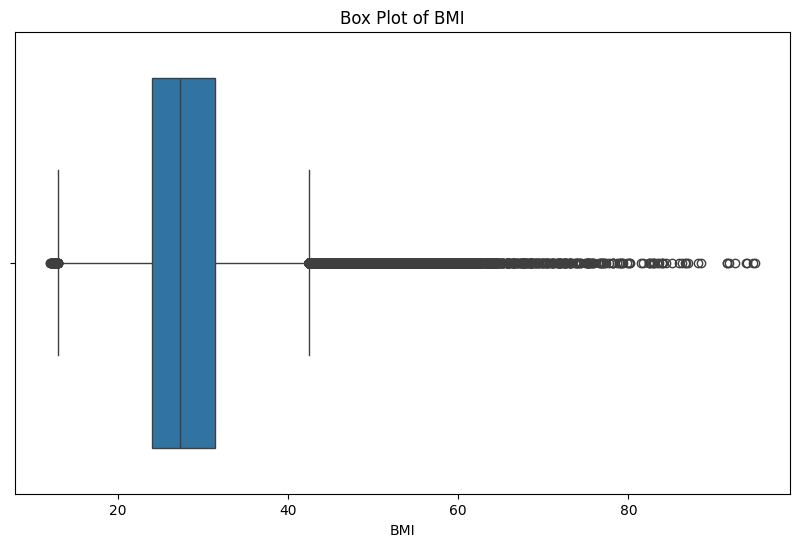

In [94]:
# Create a box plot of BMI 
plt.figure(figsize=(10,6))
sns.boxplot(x=df1['BMI'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

In [95]:
df1['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

*`=> According to the BoxPlot and the describe() function : `* <br>
*`- Q1 (25th percentile): 24.03 kg/m²`*<br>
*`- Median (50th percentile): 27.34 kg/m²`*<br>
*`- Q3 (75th percentile): 31.42 kg/m² `*

*`Let's calculate the Lower Whisker and the Upper Whisker of the Boxplot : `* 
<br>
<br>
*`- IQR = Q3 - Q1 = 31.42 - 24.03 = 7.39    "The range between Q3 and Q1" `*<br> 
<br>
*`- lower_whisker = Q1 - 1.5 * IQR = 24.03 - 1.5 * 7.39 = 12.945`*<br>
<br>
*`- upper_whisker = Q3 + 1.5 * IQR = 31.42 + 1.5 * 7.39 = 42.505`*<br>

*`=> We notice that the BMI values are between 12.945 and 42.505`*<br>
<br>
*`=> I am going to delete the outliers `* <br>
<br>
*`First let's calculate them : `*

In [96]:
# Calculate quartiles
Q1 = np.percentile(df1['BMI'], 25)
Q3 = np.percentile(df1['BMI'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Define thresholds for outliers
lower_whisker= Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Find outliers
outliers = df1[(df1['BMI'] < lower_whisker) | (df1['BMI'] > upper_whisker)]
print("Number of outliers:", len(outliers))


Number of outliers: 10396


*` => The number of the outliers is 10396 `*

In [97]:
#Remove outliers
df1 = df1[(df1['BMI'] >= lower_whisker) & (df1['BMI'] <= upper_whisker)]

print(df1.shape)

(309399, 21)


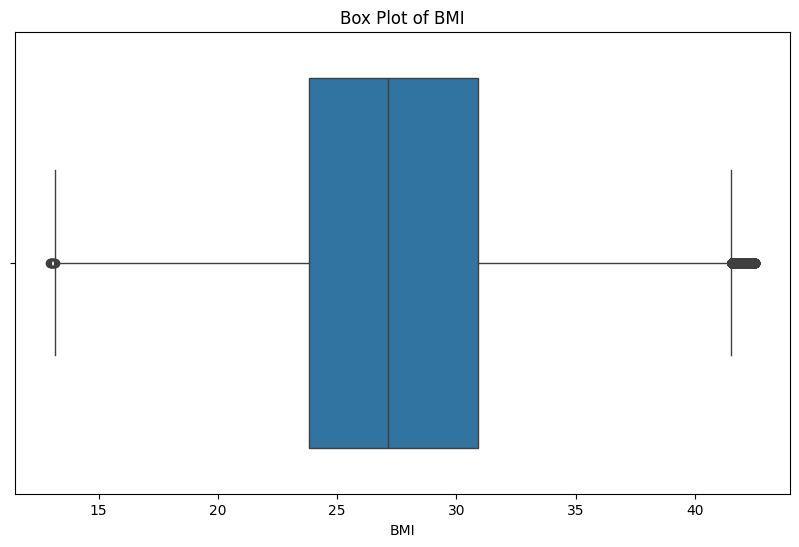

In [98]:
# Create a box plot of BMI 
plt.figure(figsize=(10,6))
sns.boxplot(x=df1['BMI'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

*`=> We removed the rows identified as outliers, and the shape of the dataframe reduced to (309399, 18).`*

*`- I want to visualize the category of BMI :`*<br><br>
*`  Underweight: BMI is less than 18.5`*<br>
<br>
*`  Normal weight: BMI is 18.5 to 24.9`*<br>
<br>
*`  Overweight: BMI is 25 to 29.9`*<br>
<br>
*`  Obese: BMI is 30 or more`*<br>


C:\Users\Kahla\AppData\Local\Temp\ipykernel_20352\3917046785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BMI_Category'] = np.select(conditions, choices)


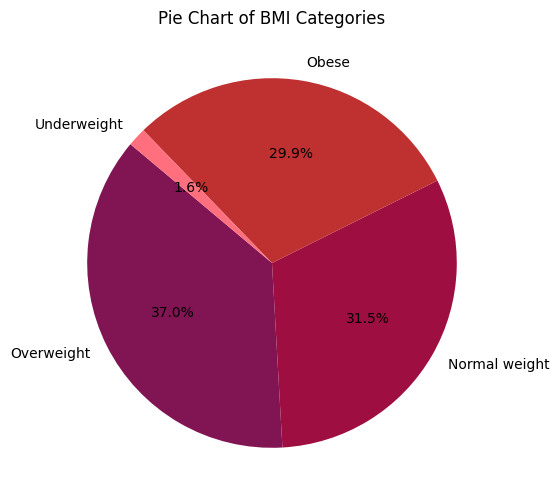

In [99]:
# Create a new column 'BMI_Category'
conditions = [
    (df1['BMI'] < 18.5),
    (df1['BMI'] >= 18.5) & (df1['BMI'] < 25),
    (df1['BMI'] >= 25) & (df1['BMI'] < 30),
    (df1['BMI'] >= 30)
]
choices = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
df1['BMI_Category'] = np.select(conditions, choices)

# Get the count of each category
counts = df1['BMI_Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140,colors = ['#811453','#9E0E40','#BF3030','#FF6F7D'])

# Add a title
plt.title('Pie Chart of BMI Categories')
# Display the plot
plt.show()


*`=> According to the Pie Chart : `*<br><br>
*`- Underweight: 1.6%`*<br>
<br>*`- Normal weight: 31.5%`*<br><br>
*`- Overweight: 37.0%`*<br><br>
*`- Obese: 29.9%`*<br>


*`=> We notice that the majority of individuals are overweight, representing a rate of (37.0%).`*<br>*` Normal weight and Obese categories are close to each other, with rates of (31.5%) and (29.9%), respectively. `*<br> *`And the Underweight category has the lowest rate of (1.6%).`*<br><br>


*`We know that the relationship between weight and the risk of heart disease is complex and multifaceted. Excess body weight, particularly obesity, is a known risk factor for cardiovascular diseases. `* 
<br><br>
*`Let's visualize the BMI categories alongside the variable 'HeartDisease'`* 

C:\Users\Kahla\AppData\Local\Temp\ipykernel_20352\3128035318.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filtered, x='HeartDisease', palette='rocket')
C:\Users\Kahla\AppData\Local\Temp\ipykernel_20352\3128035318.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filtered, x='HeartDisease', palette='rocket')
C:\Users\Kahla\AppData\Local\Temp\ipykernel_20352\3128035318.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filtered, x='HeartDisease', palette='rocket')
C:\Users\Kahla\AppData

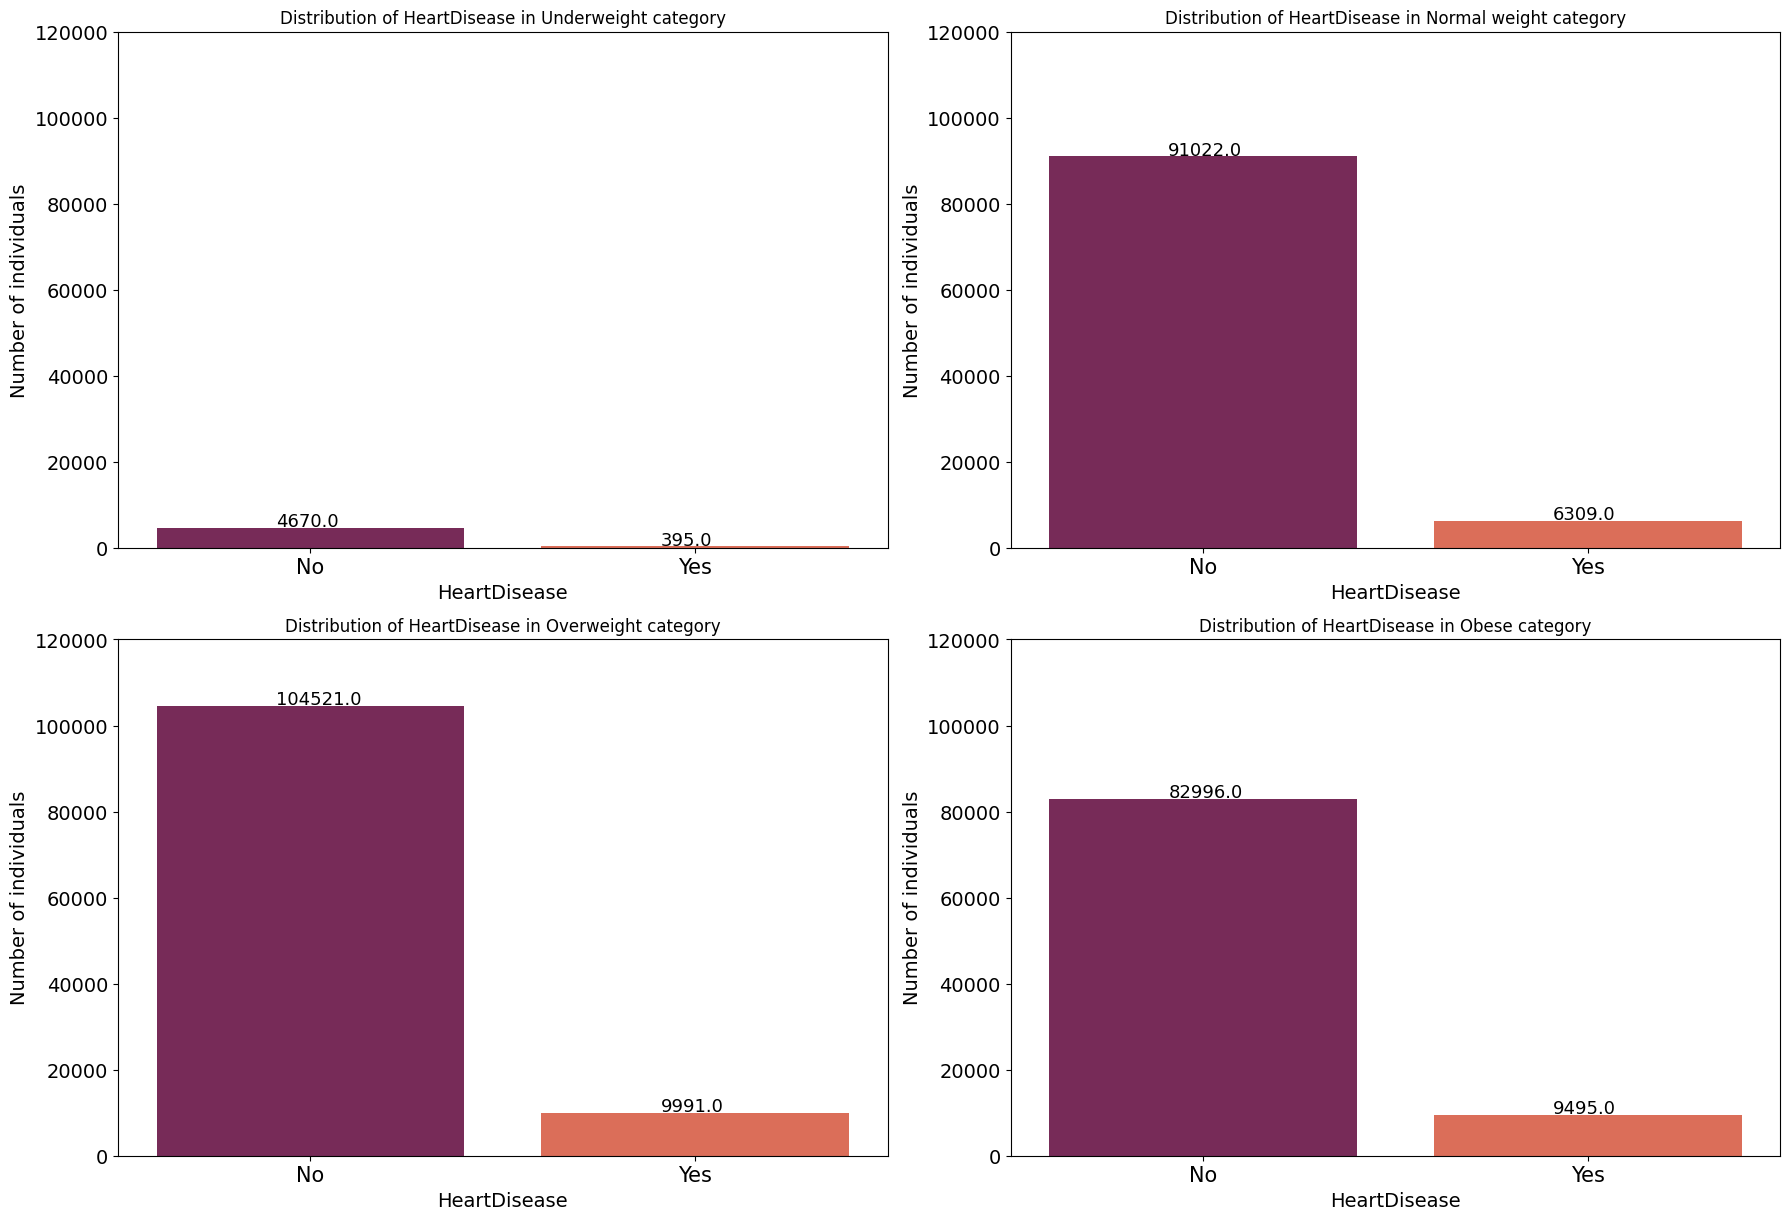

In [100]:
# Define the categories
bmi_categories = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

plt.figure(figsize=(18, 30))

for i, col in enumerate(bmi_categories):
    plt.subplot(5, 2, i + 1)
    
    # Filter the DataFrame for the current BMI category
    df_filtered = df1[df1['BMI_Category'] == col]
    
    ax = sns.countplot(data=df_filtered, x='HeartDisease', palette='rocket')

    plt.title('Distribution of HeartDisease in ' + col + ' category')
    plt.xlabel('HeartDisease', fontsize=14)
    plt.ylabel('Number of individuals', fontsize=14)
    plt.ylim(0,120000)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x() + 0.31, p.get_height() + 300), fontsize=13)

plt.tight_layout()
plt.show()

- The four charts displayed represent the distribution of heart disease across different body weight categories: underweight, normal weight, overweight, and obese.

1. Underweight category : <br><br>
   *` - Number of individuals without heart disease: 46 670`* <br>
   *`- Number of individuals with heart disease: 395`*<br>
   *`=> The majority of underweight individuals do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

2. Normal weight : <br><br>
   *` - Number of individuals without heart disease: 91 022`* <br>
   *`- Number of individuals with heart disease: 6 309`*<br>
   *`=> Individuals with a normal body weight show a relatively low prevalence of heart disease compared to their total number in the category, suggesting that maintaining a normal weight may be protective against heart disease.`*<br><br>

3. Overweight : <br><br>
   *` - Number of individuals without heart disease: 104 521`* <br>
   *`- Number of individuals with heart disease: 9 991`*<br>
   *`=> Although the total number of individuals is high, the proportion of those with heart disease is significantly higher than in the underweight and normal weight categories, indicating increased risk.`*<br><br>

4. Obese : <br><br>
   *` - Number of individuals without heart disease: 82 996`* <br>
   *`- Number of individuals with heart disease: 9 495`*<br>
   *`=> The obese category shows a significant proportion of individuals with heart disease, nearly comparable to the overweight category, despite having fewer total individuals.`*<br><br>

- Overall Analysis : <br><br>
   *`=> These charts clearly illustrate that the risk of heart disease increases with body weight. The categories of overweight and obese exhibit a much higher risk of heart disease compared to the underweight and normal weight categories. This suggests that weight management could be a key factor in preventing heart disease, with higher weights being associated with greater risk.`*




In [101]:
print(df1.columns)

Index(['Unnamed: 0', 'HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking',
       'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'prop', 'count',
       'BMI_Category'],
      dtype='object')


*`Let's visualize the Sex alongside the variable 'HeartDisease'`* 

C:\Users\Kahla\AppData\Local\Temp\ipykernel_20352\3932827850.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filtered, x='HeartDisease', palette='rocket')
C:\Users\Kahla\AppData\Local\Temp\ipykernel_20352\3932827850.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filtered, x='HeartDisease', palette='rocket')


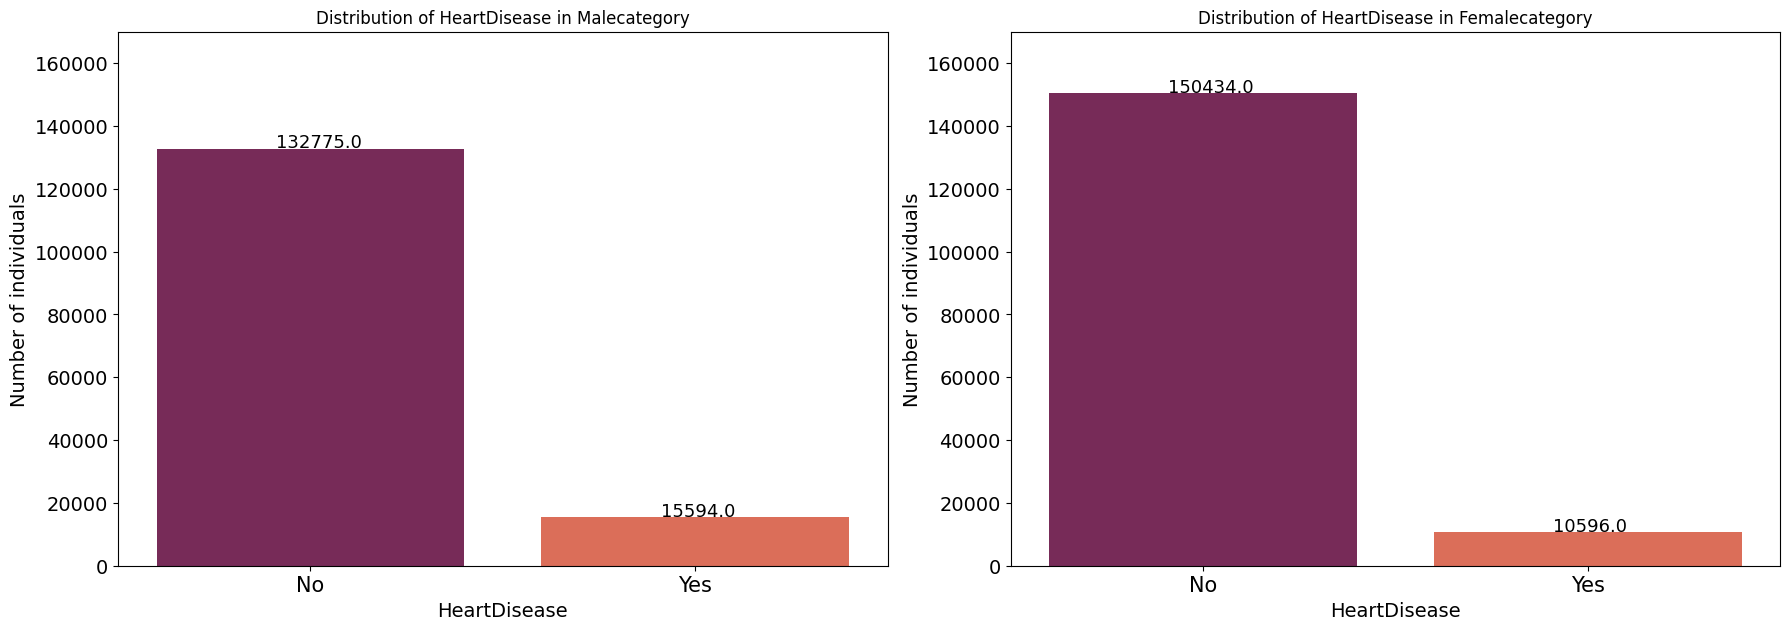

In [102]:
# Define the categories
sex_categories = ['Male', 'Female']

plt.figure(figsize=(18, 30))

for i, col in enumerate(sex_categories):
    plt.subplot(5, 2, i + 1)
    
    # Filter the DataFrame for the current Sex category
    df_filtered = df1[df1['Sex'] == col]
    
    ax = sns.countplot(data=df_filtered, x='HeartDisease', palette='rocket')

    plt.title('Distribution of HeartDisease in ' + col + 'category')
    plt.xlabel('HeartDisease', fontsize=14)
    plt.ylabel('Number of individuals', fontsize=14)
    plt.ylim(0,170000)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x() + 0.31, p.get_height() + 300), fontsize=13)

plt.tight_layout()
plt.show()

1. Male : <br><br>
   *` - Number of individuals without heart disease: 132775`* <br>
   *`- Number of individuals with heart disease: 15594`*<br>
   *`=> The majority of male individuals do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

2. Female : <br><br>
   *` - Number of individuals without heart disease: 150434`* <br>
   *`- Number of individuals with heart disease: 10596`*<br>
   *`=> The majority of female individuals do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>


- Overall Analysis : <br><br>
   *`=> These charts clearly illustrate that there is no significant correlation between sex and the prevalence of heart disease. Both males and females exhibit a relatively low prevalence of heart disease, indicating that sex alone may not be a decisive factor in determining heart disease risk in this dataset`*
    

*`Let's visualize the AgeCategory alongside the variable 'HeartDisease'`* 

In [103]:
#Determine the unique values of the attribute and the number of rows including NULL values.
df1['AgeCategory'].value_counts(dropna=False)

AgeCategory
65-69          33090
60-64          32541
70-74          30382
55-59          28615
50-54          24305
80 or older    23991
75-79          21166
45-49          20750
18-24          20679
40-44          19985
35-39          19599
30-34          17946
25-29          16350
Name: count, dtype: int64

C:\Users\Kahla\AppData\Local\Temp\ipykernel_20352\2293254911.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filtered, x='HeartDisease', palette='rocket')
C:\Users\Kahla\AppData\Local\Temp\ipykernel_20352\2293254911.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filtered, x='HeartDisease', palette='rocket')
C:\Users\Kahla\AppData\Local\Temp\ipykernel_20352\2293254911.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filtered, x='HeartDisease', palette='rocket')
C:\Users\Kahla\AppData

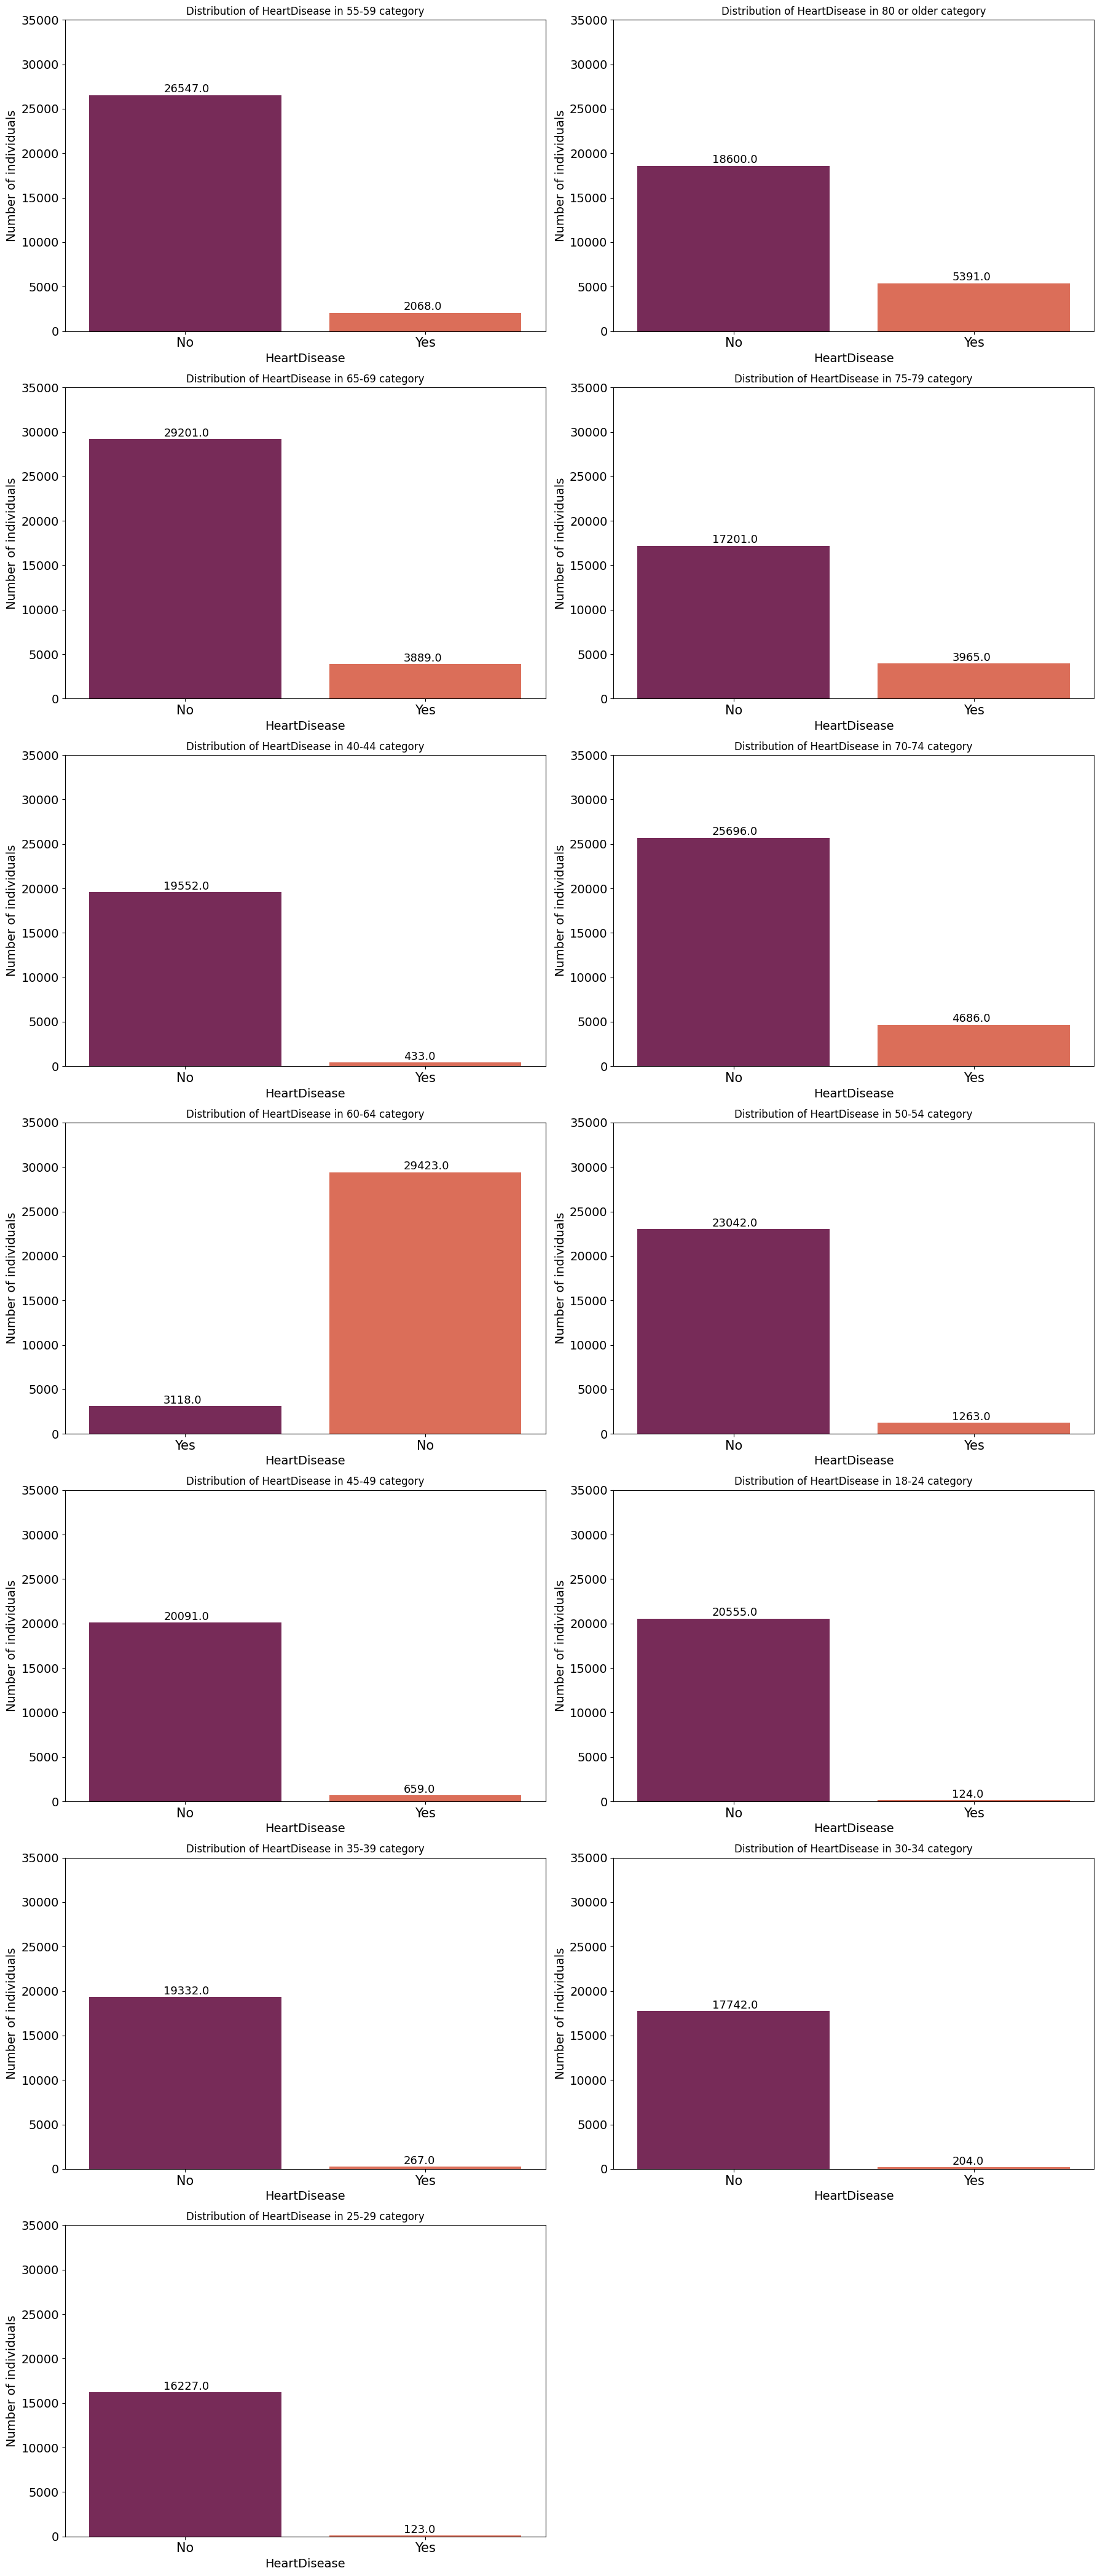

In [104]:
# Define the categories
age_categories = df1['AgeCategory'].unique()

# Calculate the number of subplots needed based on the number of age categories
num_subplots = len(age_categories)
num_rows = (num_subplots // 2) + (num_subplots % 2)

plt.figure(figsize=(18, num_rows * 6))

for i, col in enumerate(age_categories):
    plt.subplot(num_rows, 2, i + 1)
    
    # Filter the DataFrame for the current Age category
    df_filtered = df1[df1['AgeCategory'] == col]
    
    ax = sns.countplot(data=df_filtered, x='HeartDisease', palette='rocket')

    plt.title('Distribution of HeartDisease in ' + col + ' category')
    plt.xlabel('HeartDisease', fontsize=14)
    plt.ylabel('Number of individuals', fontsize=14)
    plt.ylim(0,35000)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x() + 0.31, p.get_height() + 300), fontsize=13)

plt.tight_layout()
plt.show()


1. Age between 55-59 : <br><br>
   *` - Number of individuals without heart disease: 26 547`* <br>
   *`- Number of individuals with heart disease: 2068`*<br>
   *`=> The majority of the individuals with age between 55-59 do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

2. Age between 80 or older : <br><br>
   *` - Number of individuals without heart disease: 18 600`* <br>
   *`- Number of individuals with heart disease: 5391`*<br>
   *`=> The majority of the individuals with age between 80 or older do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

3. Age between 65-69 : <br><br>
   *` - Number of individuals without heart disease: 29 201`* <br>
   *`- Number of individuals with heart disease: 3 889`*<br>
   *`=> The majority of the individuals with age between 65-69 do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

4. Age between 75-79 : <br><br>
   *` - Number of individuals without heart disease: 17 201`* <br>
   *`- Number of individuals with heart disease: 3 965`*<br>
   *`=> The majority of the individuals with age between 75-79 do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

5. Age between 40-44 : <br><br>
   *` - Number of individuals without heart disease: 19 552`* <br>
   *`- Number of individuals with heart disease: 433`*<br>
   *`=> The majority of the individuals with age between 40-44 do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

6. Age between 70-74 : <br><br>
   *` - Number of individuals without heart disease: 25 696`* <br>
   *`- Number of individuals with heart disease: 4686`*<br>
   *`=> The majority of the individuals with age between 70-74 do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

7. Age between 60-64 : <br><br>
   *` - Number of individuals without heart disease: 29 423`* <br>
   *`- Number of individuals with heart disease: 3 118`*<br>
   *`=> The majority of the individuals with age between 60-64 do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

8. Age between 50-54 : <br><br>
   *` - Number of individuals without heart disease: 23 042`* <br>
   *`- Number of individuals with heart disease: 1263`*<br>
   *`=> The majority of the individuals with age between 50-54 do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

9. Age between 45-49 : <br><br>
   *` - Number of individuals without heart disease: 20 091`* <br>
   *`- Number of individuals with heart disease: 659`*<br>
   *`=> The majority of the individuals with age between 45-49 do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

10. Age between 18-24 : <br><br>
   *` - Number of individuals without heart disease: 20 555`* <br>
   *`- Number of individuals with heart disease: 124`*<br>
   *`=> The majority of the individuals with age between 18-24 do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

10. Age between 35-39 : <br><br>
   *` - Number of individuals without heart disease: 19 332`* <br>
   *`- Number of individuals with heart disease: 267`*<br>
   *`=> The majority of the individuals with age between 35-39 do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

11. Age between 30-34 : <br><br>
   *` - Number of individuals without heart disease: 17 742`* <br>
   *`- Number of individuals with heart disease: 204`*<br>
   *`=> The majority of the individuals with age between 30-34 do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>

12. Age between 25-29 : <br><br>
   *` - Number of individuals without heart disease: 16 227`* <br>
   *`- Number of individuals with heart disease: 123`*<br>
   *`=> The majority of the individuals with age between 25-29 do not have heart disease, indicating a relatively low prevalence of heart disease in this group.`*<br><br>


- Overall Analysis : <br><br>
   *`=> The analysis of heart disease prevalence across different age groups reveals several important insights. While age is a significant risk factor for heart disease, with older individuals generally experiencing higher prevalence rates, it's crucial to note that the majority of individuals in each age category do not have heart disease. This suggests that while age plays a role, it is not the sole determinant of heart disease risk.`*




*`Let's visualize the conditions "Stroke, SkinCancer, KidneyDisease, Asthma, Diabetic" alongside the variable 'HeartDisease'`* 

<Figure size 1400x1000 with 0 Axes>

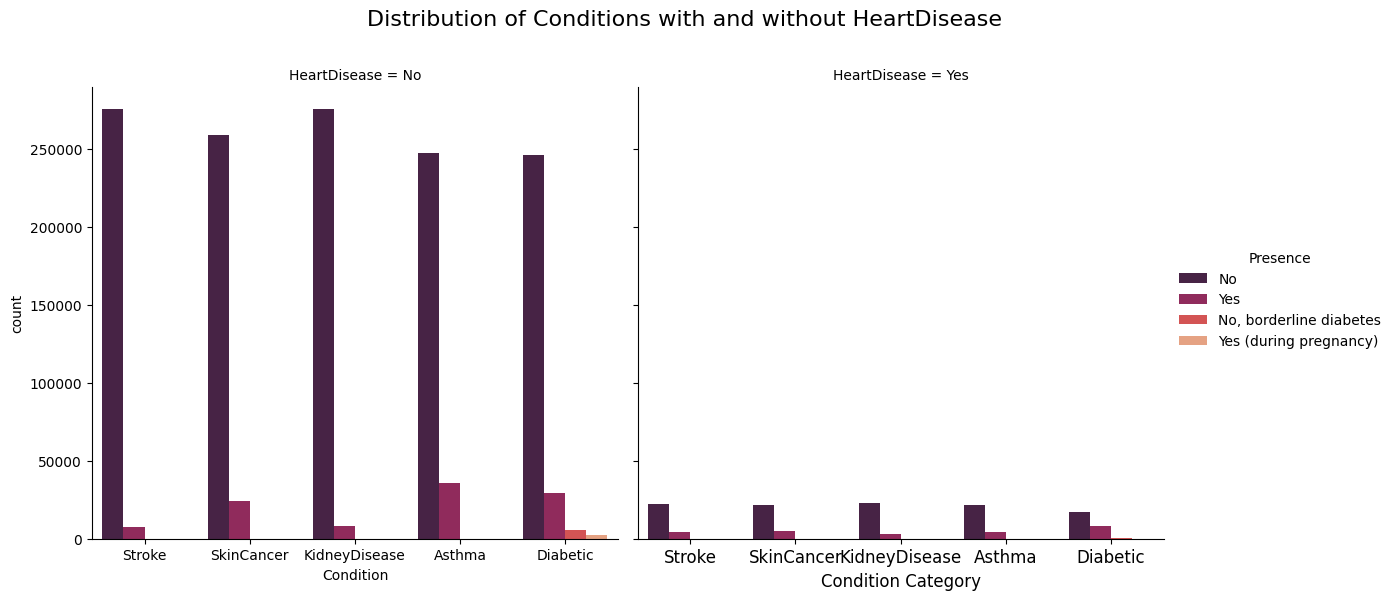

In [105]:
# Define the condition categories based on the column names
condition_categories = ['Stroke', 'SkinCancer', 'KidneyDisease', 'Asthma', 'Diabetic']

# Define the categories and reshape the data for visualization
data_to_plot = df1.melt(id_vars=['HeartDisease'], value_vars=condition_categories, var_name='Condition', value_name='Presence')

# Create a categorical plot
plt.figure(figsize=(14, 10))
sns.catplot(data=data_to_plot, x='Condition', hue='Presence', col='HeartDisease', kind='count', palette='rocket', height=6, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle('Distribution of Conditions with and without HeartDisease', fontsize=16)
plt.xlabel('Condition Category', fontsize=12)
plt.ylabel('Number of individuals', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


- The image displays a set of bar graphs illustrating the distribution of various health conditions among individuals with and without heart disease. Each graph represents a different medical condition, including stroke, skin cancer, kidney disease, asthma, and diabetes. 

- HeartDisease = No <br><br>
*`Stroke, Skin Cancer, Kidney Disease, Asthma: The majority of individuals do not have these conditions, as indicated by the tall purple bars. The presence of these conditions (red bars) is significantly lower.`*<br><br>
*`Diabetes: This graph shows a similar trend with a large majority not having diabetes. There is a small segment of individuals with borderline diabetes (light purple) and a very small number reporting diabetes during pregnancy (dark red).`*<br><br>

- HeartDisease = Yes <br><br>
*`All Conditions: The distributions are similar to those without heart disease, but on a smaller scale due to fewer total individuals with heart disease. The bars indicating the presence of each condition (red) are slightly more prominent relative to the total, which could suggest a higher prevalence of these conditions among heart disease patients compared to the general population without heart disease.`*<br><br>

*`=> The significant difference in scale between individuals with and without heart disease across all conditions suggests that the overall number of individuals with heart disease is lower.`*<br><br>


*`Let's visualize the relationship between Physical Health, Mental Health, and the presence of Heart Disease. `*

<Figure size 1200x800 with 0 Axes>

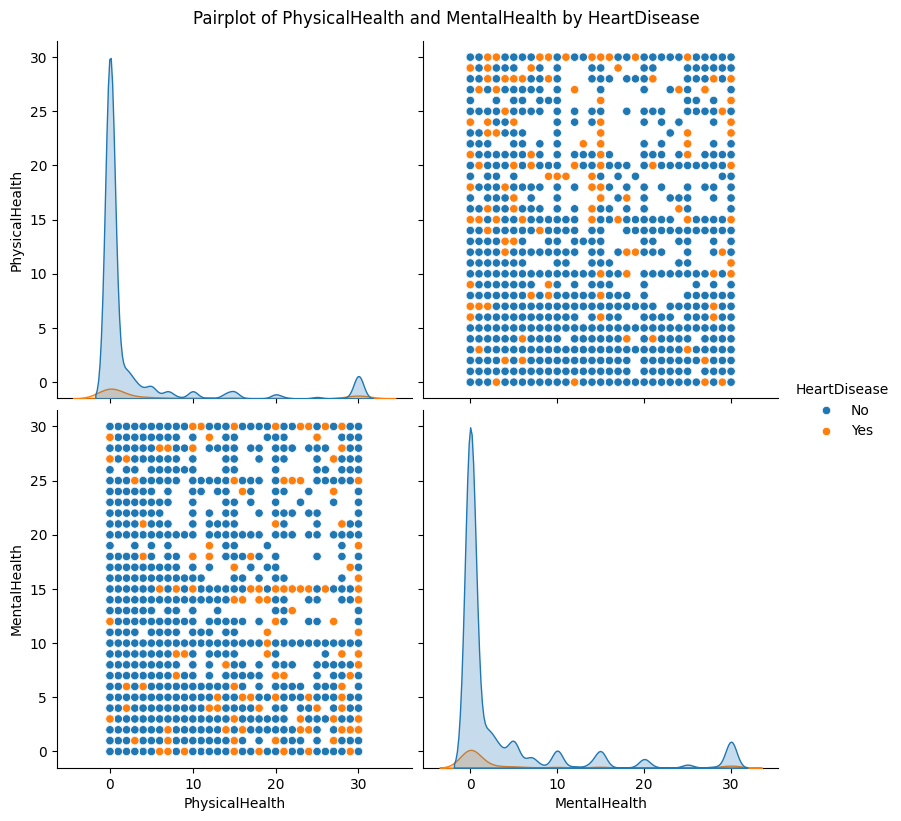

In [106]:
plt.figure(figsize=(12, 8))

sns.pairplot(df1, hue='HeartDisease', vars=['PhysicalHealth', 'MentalHealth'], height=4)
plt.suptitle('Pairplot of PhysicalHealth and MentalHealth by HeartDisease', y=1.02)
plt.show()

- The image depicts a pair of plots analyzing the relationship between Physical Health, Mental Health, and the presence of Heart Disease. Here's a detailed analysis of each component of the plots:

1- Marginal Histograms : <br><br>
*` - The histograms on the left and top of the pair plot provide distributions for Physical Health and Mental Health, respectively. `* <br><br>
*`- For Physical Health, there's a significant spike at the lower end of the scale (close to zero), suggesting that most observations have a low number of days with physical health problems. There's a long tail indicating fewer individuals experiencing more physical health issues.`*<br><br>
*` - The Mental Health histogram shows a similar distribution, with a large number of observations near zero, indicating few mental health problems on most days, and fewer instances as the number of days with issues increases.`*<br><br>

2- Scatter Plot : <br><br>
*` - The top right scatter plot indicates a relatively even distribution of individuals with and without heart disease across various levels of mental health, regardless of their physical health days.`*<br><br>
*` - The bottom left scatter plot mirrors the top right, providing the same information but aligned differently for an easier comparison of the two variables.`*<br><br>

3- Correlation and Distribution: <br><br>
   *`- There does not appear to be a strong correlation between the number of physical health days and mental health days, as the data points are widely spread without a clear directional pattern.`*
   *`- Individuals with heart disease (orange dots) are somewhat uniformly distributed throughout, suggesting no strong immediate correlation between the number of days with physical or mental health issues and the presence of heart disease.`*<br><br>

*`=> The presence of heart disease is not concentrated in any specific area of the physical or mental health count, indicating that, in this dataset, heart disease prevalence is not heavily influenced by the number of bad physical or mental health days reported.`*<br><br>


*` Let's visualize the distribution of Smoking and AlcoholDrinkers alongside the variable 'HeartDisease'`*

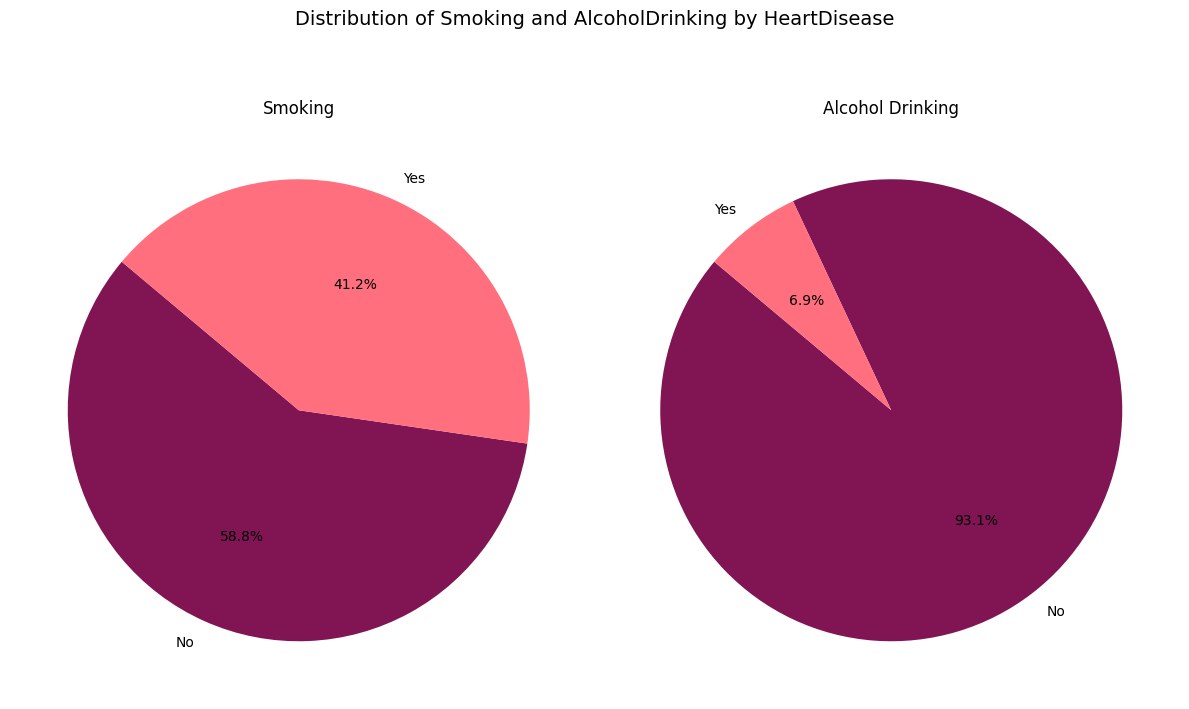

In [107]:
# Filter the data for each category
smoking_counts = df1['Smoking'].value_counts()
alcohol_counts = df1['AlcoholDrinking'].value_counts()

# Define labels and colors
smoking_labels = smoking_counts.index
smoking_colors = ['#811453','#FF6F7D']
alcohol_labels = alcohol_counts.index
alcohol_colors = ['#811453','#FF6F7D']

# Plot pie charts
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.pie(smoking_counts, labels=smoking_labels, colors=smoking_colors, autopct='%1.1f%%', startangle=140)
plt.title('Smoking')

plt.subplot(1, 2, 2)
plt.pie(alcohol_counts, labels=alcohol_labels, colors=alcohol_colors, autopct='%1.1f%%', startangle=140)
plt.title('Alcohol Drinking')

plt.suptitle('Distribution of Smoking and AlcoholDrinking by HeartDisease', fontsize=14)
plt.tight_layout()
plt.show()

- The image contains two pie charts that illustrate the distribution of smoking and alcohol drinking among individuals with heart disease. Here’s a detailed analysis of each chart:

1- Smoking : <br><br>
*` - The pie chart is divided into two segments indicating the proportion of individuals with heart disease who smoke and those who do not.`*<br>
*` - Yes (Smokers): Approximately 41.2% of the individuals with heart disease reported that they smoke.`*<br>
*` - No (Non-Smokers): Approximately 58.8% of the individuals with heart disease reported that they do not smoke.`*<br><br>

2- AlcoholDrinking : <br><br>
*` Similar to the smoking chart, this chart shows the distribution of alcohol consumption among individuals with heart disease.`*<br>
*` - Yes (Alcohol Drinkers): About 6.9% of the individuals with heart disease consume alcohol.`*<br>
*` - No (Non-Alcohol Drinkers): Approximately 93.1% of the individuals with heart disease do not consume alcohol.`*<br><br>

- Overall Analysis : <br><br>

*` => The smoking pie chart shows a relatively high prevalence of smoking among individuals with heart disease, with nearly half of the group being smokers. This is notable as smoking is a well-known risk factor for heart disease.`*<br>

*` => The alcohol drinking pie chart indicates a low prevalence of alcohol consumption among individuals with heart disease, with only a small percentage reporting alcohol consumption. This suggests that alcohol consumption may not be a significant risk factor for heart disease in this dataset.`*<br><br>


# Conclusion :

*`The analysis of heart disease data presents a nuanced understanding of the factors influencing heart disease risk. It underscores a strong correlation between body weight and heart disease risk, with overweight and obese individuals exhibiting significantly higher risks compared to those with normal weight. This highlights the importance of weight management as a key preventive measure. Interestingly, the analysis reveals that sex alone may not be a decisive factor in heart disease prevalence, as both males and females show relatively low rates. Age, however, emerges as a significant risk factor, with older individuals facing higher prevalence rates, although the majority within each age group do not have heart disease, suggesting a multifaceted risk landscape. Furthermore, while smoking is notably prevalent among those with heart disease, alcohol consumption appears to have a lower association with heart disease risk in this dataset. These findings collectively emphasize the complex interplay of factors contributing to heart disease and the need for tailored interventions addressing diverse risk profiles.`*

# Modeling 

*` We going to train our model using Random Forest `*<br>

**Random Forest is a popular machine learning algorithm that is used for both classification and regression tasks.**<br>

**The reasons why we chose Random Forest as classifier :**<br>

**- High Accuracy: Random Forest tends to have high accuracy compared to many other classification algorithms. It builds multiple decision trees and merges their predictions, which can reduce overfitting and improve generalization.**<br><br>
**- Handles Large Datasets: Random Forest can handle large datasets with many features and instances. It is also effective in dealing with missing values and outliers.**<br><br>
**- Reduces Overfitting: By aggregating predictions from multiple decision trees, Random Forest can reduce overfitting compared to a single decision tree model.**<br><br>
**- Feature Importance: Random Forest provides a measure of feature importance, which can help in understanding which features are most relevant for making predictions.**<br><br>
**- Robustness: Random Forest is robust to noise and outliers in the data due to its ensemble approach.**<br><br>
**- Parallel Processing: The training of individual decision trees in a Random Forest can be parallelized, making it efficient for large datasets.**<br><br>

In [108]:
# Load data
df_model = pd.read_csv('./Data/2020/heart_2020_cleaned.csv')

In [109]:
df_model.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [110]:
# generate dummies columns 
df_model = pd.get_dummies(df_model, drop_first=True)

- To convert categorical variables in the DataFrame into numerical labels we used LabelEncoder.

In [111]:
#check the result 
df_model.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease _Yes,Smoking _Yes,AlcoholDrinking _Yes,Stroke _Yes,DiffWalking _Yes,Sex _Male,...,Diabetic _Yes,Diabetic _Yes (during pregnancy),PhysicalActivity _Yes,GenHealth _Fair,GenHealth _Good,GenHealth _Poor,GenHealth _Very good,Asthma _Yes,KidneyDisease _Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,False,True,False,False,False,False,...,True,False,True,False,False,False,True,True,False,True
1,20.34,0.0,0.0,7.0,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,26.58,20.0,30.0,8.0,False,True,False,False,False,True,...,True,False,True,True,False,False,False,True,False,False
3,24.21,0.0,0.0,6.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,23.71,28.0,0.0,8.0,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False


In [112]:
#Display the columns of the dataset
print(df_model.columns)

Index(['BMI   ', 'PhysicalHealth ', 'MentalHealth ', 'SleepTime ',
       'HeartDisease _Yes          ', 'Smoking _Yes     ',
       'AlcoholDrinking _Yes             ', 'Stroke _Yes    ',
       'DiffWalking _Yes         ', 'Sex    _Male   ',
       'AgeCategory _25-29       ', 'AgeCategory _30-34       ',
       'AgeCategory _35-39       ', 'AgeCategory _40-44       ',
       'AgeCategory _45-49       ', 'AgeCategory _50-54       ',
       'AgeCategory _55-59       ', 'AgeCategory _60-64       ',
       'AgeCategory _65-69       ', 'AgeCategory _70-74       ',
       'AgeCategory _75-79       ', 'AgeCategory _80 or older ',
       'Race                           _Asian                          ',
       'Race                           _Black                          ',
       'Race                           _Hispanic                       ',
       'Race                           _Other                          ',
       'Race                           _White                         

*` We notice that there are spaces in the columns of the dataset`*<br>
*`=> We will remove them `*

In [122]:
#Remove Spaces in the columns of the dataset
df_model.columns = df_model.columns.str.strip()

In [123]:
#Verify the result
print(df_model.columns)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'HeartDisease _Yes', 'Smoking _Yes', 'AlcoholDrinking _Yes',
       'Stroke _Yes', 'DiffWalking _Yes', 'Sex    _Male', 'AgeCategory _25-29',
       'AgeCategory _30-34', 'AgeCategory _35-39', 'AgeCategory _40-44',
       'AgeCategory _45-49', 'AgeCategory _50-54', 'AgeCategory _55-59',
       'AgeCategory _60-64', 'AgeCategory _65-69', 'AgeCategory _70-74',
       'AgeCategory _75-79', 'AgeCategory _80 or older',
       'Race                           _Asian',
       'Race                           _Black',
       'Race                           _Hispanic',
       'Race                           _Other',
       'Race                           _White',
       'Diabetic                  _No, borderline diabetes',
       'Diabetic                  _Yes',
       'Diabetic                  _Yes (during pregnancy)',
       'PhysicalActivity _Yes', 'GenHealth _Fair', 'GenHealth _Good',
       'GenHealth _Poor', 'GenHealth _Ve

*`There are no spaces in our dataset`*

In [124]:
# Split data into features and target
X = df_model.drop('HeartDisease _Yes', axis=1)
y = df_model['HeartDisease _Yes']

In [125]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [126]:
# Feature Selection
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)


**We will split our dataset to :**<br>
**- 80% train set**<br>
**- 20% test set**

In [127]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


In [128]:
# Create and train model with best parameters
model = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200)

**Model Evaluation Metrics**<br><br>

*`- Accuracy: It is the ratio of correctly predicted observation to the total observations. High accuracy is a good sign, but we must also check other metrics to be sure, especially when dealing with imbalanced datasets. `*<br><br>
*`- Precision: It is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate.`*<br><br>
*`- Recall (Sensitivity): It is the ratio of correctly predicted positive observations to the all observations in actual class. The recall has improved significantly, which means the model is now better at correctly classifying the positive class.`*<br><br>
*`- F1 Score: The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. The F1 Score is usually more useful than accuracy, especially if you have an uneven class distribution.`*<br><br>
*`- F1 = 2 ∗ Precision+Recall/Precision∗Recall`*



In [129]:
# Make predictions and evaluate model
y_pred = model.predict(X_test)
print('Without SMOTE:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Without SMOTE:
Accuracy: 0.9134758204474742
Precision: 0.5486577181208053
Recall: 0.05847639484978541
F1 Score: 0.10568842921784098


*`=> These metrics suggest that while the model is accurate in general, it’s not very effective at identifying positive cases (i.e., patients with heart disease). The low recall indicates that the model is missing a large number of positive cases. The F1 score, which balances precision and recall, is also quite low, indicating that the model could be improved.`*

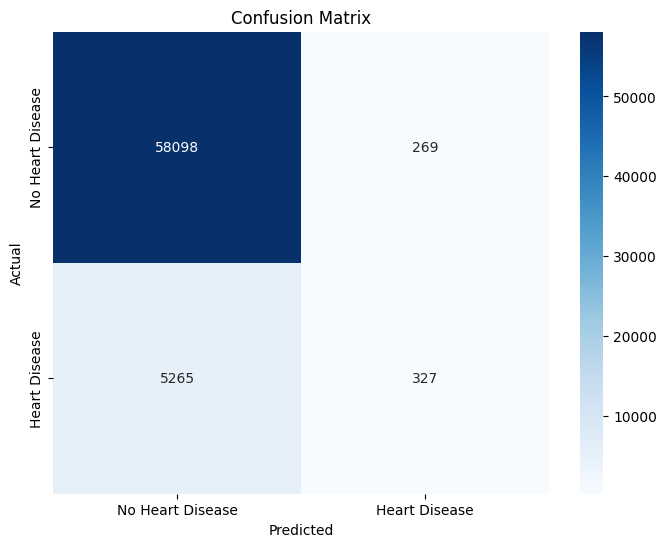

In [130]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'], 
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

*`True Negatives (TN): 58,098 cases were correctly predicted as “No Heart Disease.”`*<br>
*`False Positives (FP): 269 cases were wrongly predicted as “Heart Disease” when they had no heart disease.`*<br>
*`False Negatives (FN): 5,265 cases were wrongly predicted as “No Heart Disease” when they actually had heart disease.`*<br>
*`True Positives (TP): 327 cases were correctly predicted as having “Heart Disease.” `*

*`=> According to the Confusion Matrix we notice that the data is not balanced `*

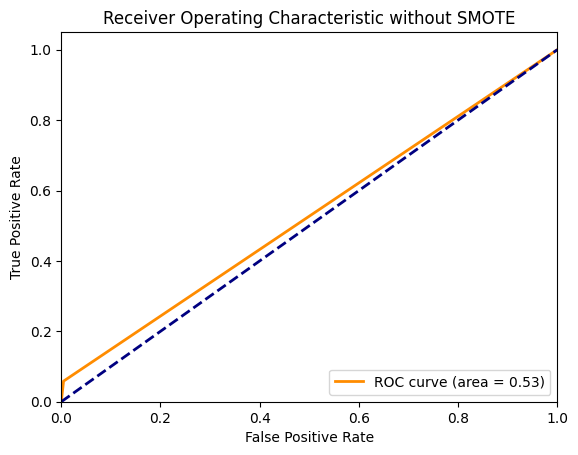

In [131]:
# Calculate ROC curve and ROC AUC for predictions without SMOTE
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic without SMOTE')
plt.legend(loc="lower right")
plt.show()

*`AUC Value: The area under the curve (AUC) is 0.53, which suggests that the model’s ability to distinguish between the positive and negative classes is marginally better than random chance.
Performance: An AUC of 0.53 indicates mediocre performance. Typically, an AUC closer to 1.0 signifies excellent model performance, while an AUC closer to 0.5 suggests no discriminative power.`*<br><br>
*`Interpretation: The model might need improvements or adjustments`* 

*We used SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address class imbalance in datasets, particularly in binary classification problems where one class is significantly underrepresented compared to the other.*

In [139]:
# Now apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

**We will split our dataset to :**<br>
**- 80% train set**<br>
**- 20% test set**

In [140]:
# Split the resampled data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [141]:
# Fit the model on the balanced data
model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200)

In [135]:
# Make predictions and evaluate model
y_pred_res = model.predict(X_test_res)
print('With SMOTE:')
print('Accuracy:', accuracy_score(y_test_res, y_pred_res))
print('Precision:', precision_score(y_test_res, y_pred_res))
print('Recall:', recall_score(y_test_res, y_pred_res))
print('F1 Score:', f1_score(y_test_res, y_pred_res))

With SMOTE:
Accuracy: 0.8172507245509494
Precision: 0.822745616476482
Recall: 0.8087340127214281
F1 Score: 0.8156796468112992


*`With SMOTE, our model's performance evaluation metrics indicate strong predictive capabilities. With an accuracy of 81.73%, it correctly predicted the outcome for approximately 81.73% of the total cases. Precision, measuring the correctness of positive predictions, stands at 82.27%, indicating that when our model predicts a patient has heart disease, it is accurate about 82.27% of the time. Sensitivity, or recall, is at 80.87%, suggesting that our model identified 80.87% of all patients who actually have heart disease. Additionally, the F1 Score, a weighted average of precision and recall, is 81.57%, demonstrating robust performance, especially in scenarios with imbalanced class distributions. Overall, these metrics collectively validate the effectiveness of our model in accurately predicting heart disease.`*

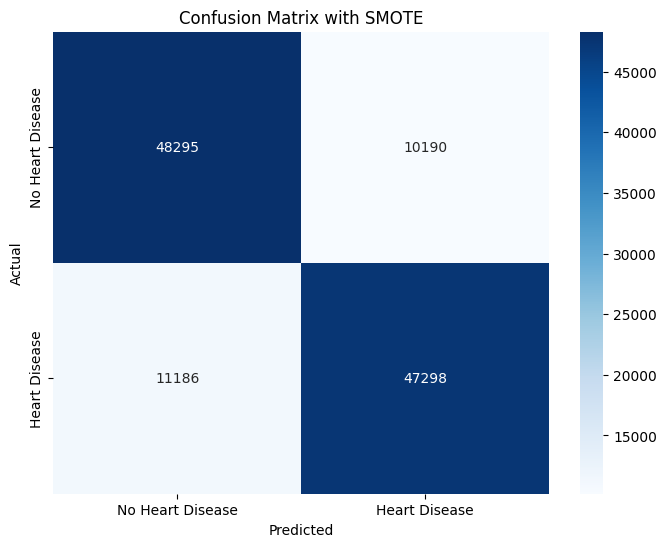

In [136]:
# Calculate and visualize confusion matrix
conf_matrix_res = confusion_matrix(y_test_res, y_pred_res)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_res, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'], 
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

*`True Positives (TP): 47298 patients were correctly predicted to have heart disease.`*<br>
*`True Negatives (TN): 48295 patients were correctly predicted not to have heart disease.`*<br>
*`False Positives (FP): 10190 patients were incorrectly predicted to have heart disease.`*<br>
*`False Negatives (FN): 11186 patients were incorrectly predicted not to have heart disease.`*<br>
*`The matrix indicates the model’s performance with SMOTE (Synthetic Minority Over-sampling Technique) applied to balance the dataset. The high numbers of TP and TN suggest the model is performing well in identifying both classes. However, the FP and FN values indicate there’s room for improvement, particularly in reducing the number of incorrect predictions.`*

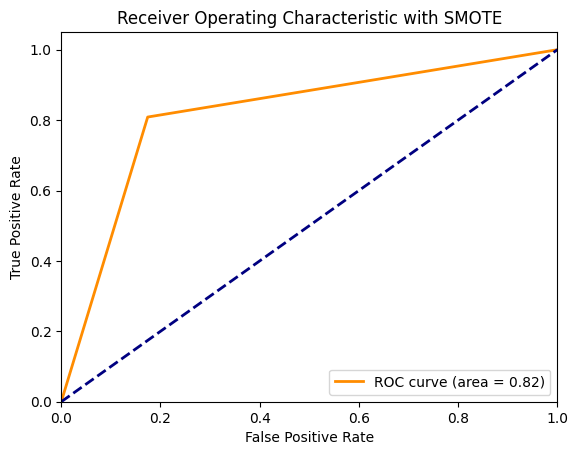

In [137]:
# Calculate ROC curve and ROC AUC for predictions with SMOTE
fpr_res, tpr_res, _ = roc_curve(y_test_res, y_pred_res)
roc_auc_res = roc_auc_score(y_test_res, y_pred_res)

plt.figure()
plt.plot(fpr_res, tpr_res, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_res)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with SMOTE')
plt.legend(loc="lower right")
plt.show()

*`True Positive Rate (TPR): The Y-axis represents the TPR, which indicates the proportion of positive instances correctly identified by the model.`*<br>
*`False Positive Rate (FPR): The X-axis shows the FPR, reflecting the proportion of negative instances incorrectly classified as positive.`*<br>
*`ROC Curve: The orange solid line represents the ROC curve, which ideally should be close to the top-left corner of the graph for better model performance.`*<br>
*`Area Under Curve (AUC): The AUC is 0.82, suggesting that the model has a good predictive ability. A perfect model would have an AUC of 1.`*<br>
*`The ROC curve with an AUC of 0.82 indicates that the model has a good balance between sensitivity (TPR) and specificity (1 - FPR), especially when compared to a random classifier represented by the blue dashed line. The use of SMOTE likely helped to improve the model’s performance by addressing class imbalance.`*

In [138]:
# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

### <span style="color:#40E0D0; font-weight:bold;">*Thank you for your attention* </span>